In [2]:
# Data exploration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb

fetal_data = pd.read_csv('fetal_health.csv')
fetal_data.info()
fetal_data.describe()
fetal_data['fetal_health'].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


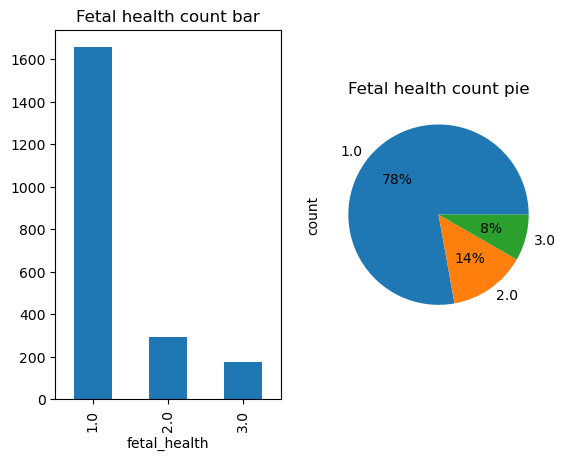

In [3]:
fetal_health = fetal_data['fetal_health']
fetal_data.count()
print(fetal_health.value_counts())

fetal_value_counts = fetal_health.value_counts()

plt.subplot(121)
fetal_value_counts.plot(kind='bar')
plt.title("Fetal health count bar")

plt.subplot(122)
fetal_value_counts.plot(kind='pie', autopct="%1.0f%%")
plt.title("Fetal health count pie")

plt.show()


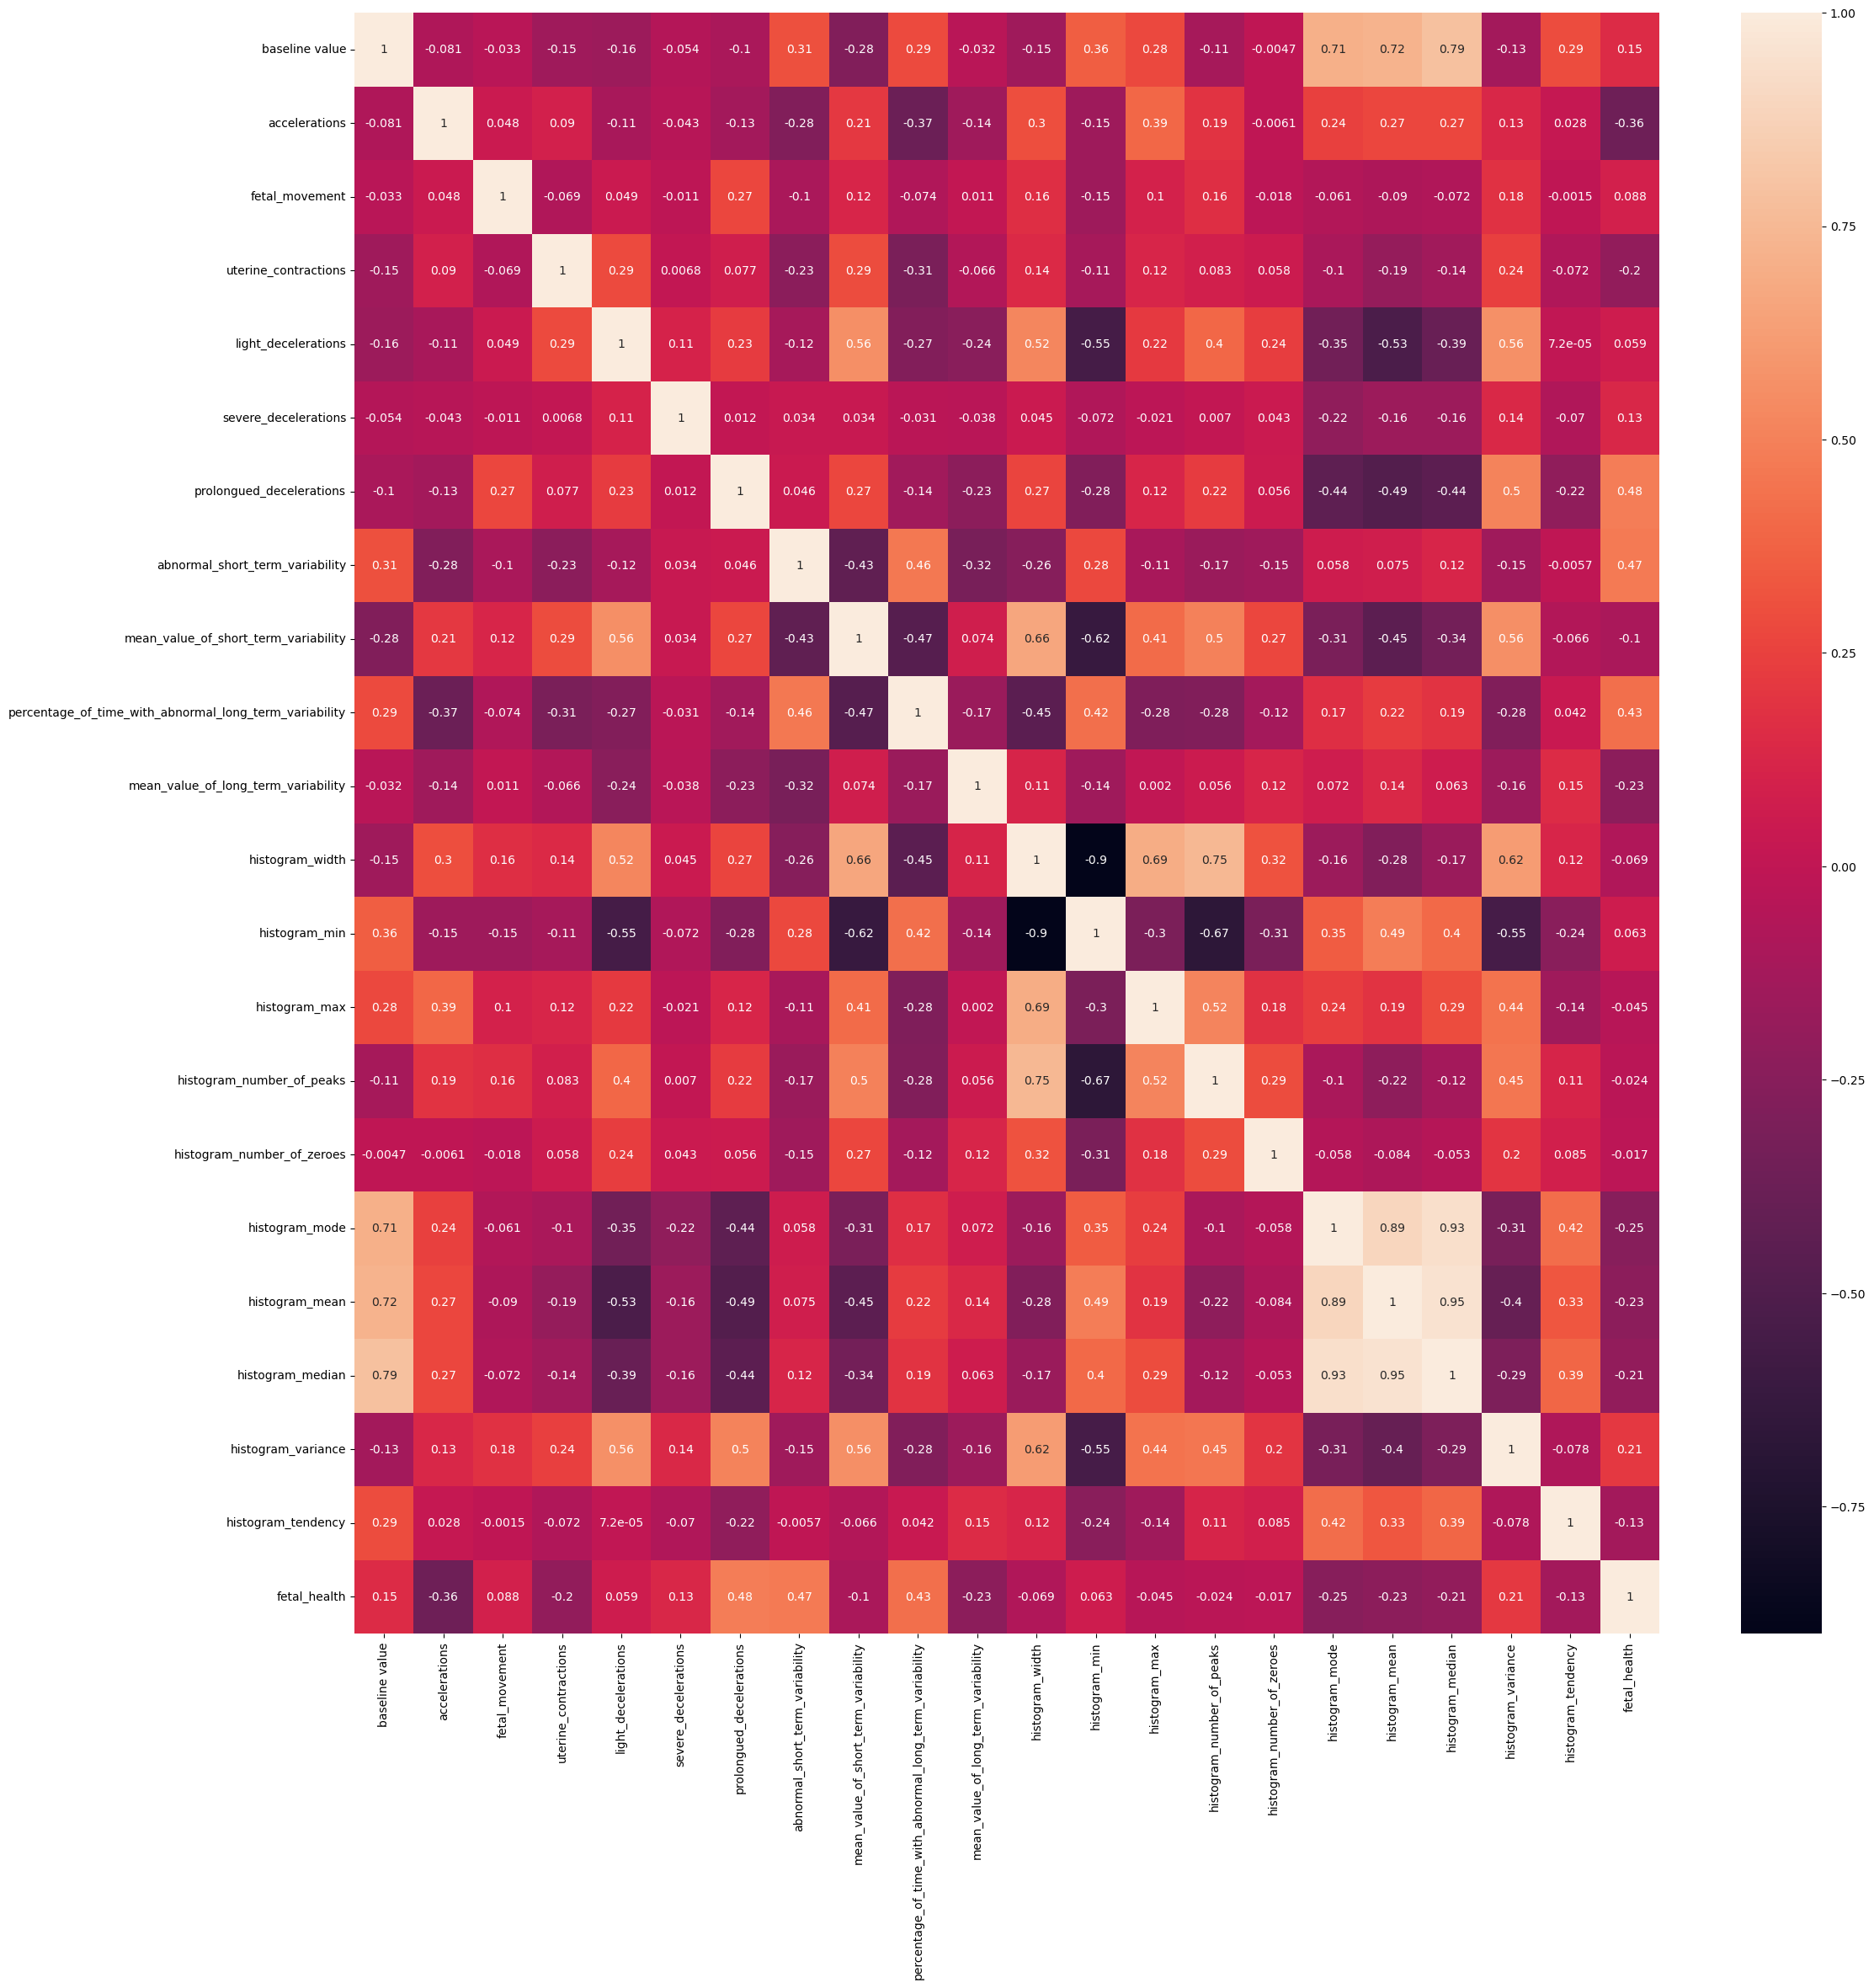

                                                    fetal_health
fetal_health                                            1.000000
prolongued_decelerations                                0.484859
abnormal_short_term_variability                         0.471191
percentage_of_time_with_abnormal_long_term_vari...      0.426146
histogram_variance                                      0.206630
baseline value                                          0.148151
severe_decelerations                                    0.131934
fetal_movement                                          0.088010
histogram_min                                           0.063175
light_decelerations                                     0.058870
histogram_number_of_zeroes                             -0.016682
histogram_number_of_peaks                              -0.023666
histogram_max                                          -0.045265
histogram_width                                        -0.068789
mean_value_of_short_term_

In [4]:
# Correlation matrix for the different columns
fetal_corr = fetal_data.corr()
plt.figure(figsize=(25,25))
sb.heatmap(fetal_corr,annot=True)
plt.show()

fetal_corr_df = fetal_corr["fetal_health"].sort_values(ascending=False).head(22).to_frame()
plt.show()

print(fetal_corr_df)



So we can see that 

prolongued_decelerations                                0.484859
abnormal_short_term_variability                         0.471191
percentage_of_time_with_abnormal_long_term_vari...      0.426146
and accelerations                                      -0.364066 which is inversely correlated

are the most related to fetal_health

array([[<Axes: title={'center': 'prolongued_decelerations'}>,
        <Axes: title={'center': 'abnormal_short_term_variability'}>],
       [<Axes: title={'center': 'percentage_of_time_with_abnormal_long_term_variability'}>,
        <Axes: title={'center': 'accelerations'}>]], dtype=object)

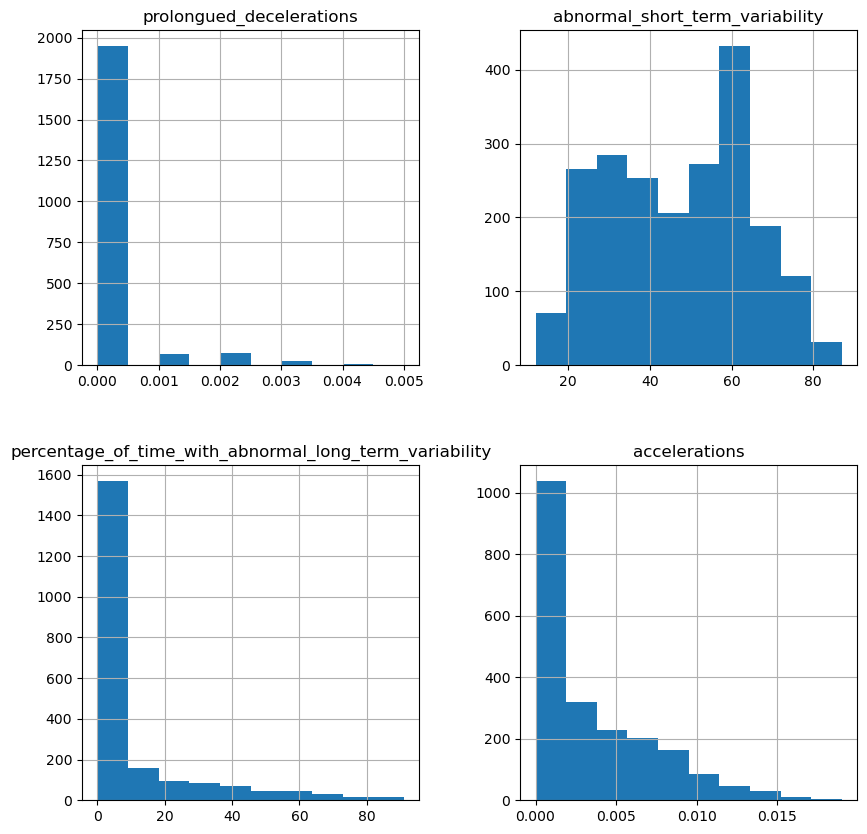

In [5]:
fetal_data[['prolongued_decelerations','abnormal_short_term_variability','percentage_of_time_with_abnormal_long_term_variability', 'accelerations' ]].hist(figsize=(10,10))


In [6]:
# K-Means model

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

fetal_clust=fetal_data[['accelerations','percentage_of_time_with_abnormal_long_term_variability','prolongued_decelerations','abnormal_short_term_variability']]

# Normalize data with z-score

scaler = StandardScaler()
fetal_clust_scaled = scaler.fit_transform(fetal_clust)

fetal_clust_scaled[:100]

array([[-0.8223883 ,  1.80254152, -0.2687543 ,  1.51319018],
       [ 0.73013282, -0.53536128, -0.2687543 , -1.74475094],
       [-0.04612774, -0.53536128, -0.2687543 , -1.80292846],
       [-0.04612774, -0.53536128, -0.2687543 , -1.80292846],
       [ 0.98888634, -0.53536128, -0.2687543 , -1.80292846],
       [-0.56363478, -0.53536128,  3.12217536, -1.22115326],
       [-0.56363478, -0.53536128,  4.81764019, -1.0466207 ],
       [-0.8223883 , -0.20914228, -0.2687543 ,  2.09496539],
       [-0.8223883 , -0.26351211, -0.2687543 ,  2.15314291],
       [-0.8223883 , -0.20914228, -0.2687543 ,  2.26949795],
       [-0.8223883 , -0.04603278, -0.2687543 ,  0.9895925 ],
       [-0.8223883 , -0.10040262, -0.2687543 ,  0.9895925 ],
       [ 0.4713793 , -0.53536128, -0.2687543 , -1.10479822],
       [ 1.50639338, -0.53536128, -0.2687543 , -1.10479822],
       [ 0.73013282, -0.53536128,  1.42671053, -1.51204086],
       [ 0.73013282, -0.53536128,  1.42671053, -1.6283959 ],
       [ 0.73013282, -0.

k-elbow :  5


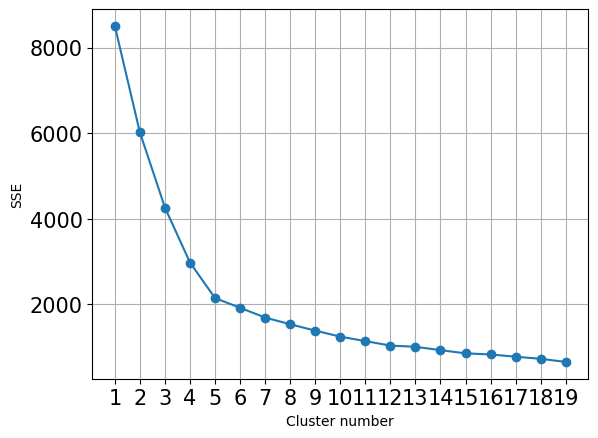

In [7]:
# Elbow method to get the appropriate k
from kneed import KneeLocator

sse_list = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(fetal_clust_scaled)
    sse = kmeans.inertia_
    sse_list.append(sse)

kl = KneeLocator(range(1, 20), sse_list, curve="convex", direction="decreasing")
print("k-elbow : ",kl.elbow)

plt.plot(range(1, 20), sse_list, marker = 'o')
plt.xticks(range(1, 20))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel("Cluster number")
plt.ylabel("SSE")
plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3268185929448851
For n_clusters = 3 The average silhouette_score is : 0.2974379553964076
For n_clusters = 4 The average silhouette_score is : 0.36549455030103645
For n_clusters = 5 The average silhouette_score is : 0.3956101106261169
For n_clusters = 6 The average silhouette_score is : 0.39206090711343883
For n_clusters = 7 The average silhouette_score is : 0.3664142104588378
For n_clusters = 8 The average silhouette_score is : 0.35810604152284686
For n_clusters = 9 The average silhouette_score is : 0.3669165065171489
For n_clusters = 10 The average silhouette_score is : 0.34979428052318756
For n_clusters = 11 The average silhouette_score is : 0.3388630061207085
For n_clusters = 12 The average silhouette_score is : 0.3494919119248744
For n_clusters = 13 The average silhouette_score is : 0.35739149764247274
For n_clusters = 14 The average silhouette_score is : 0.3371752699670565
For n_clusters = 15 The average silhouette_score is : 

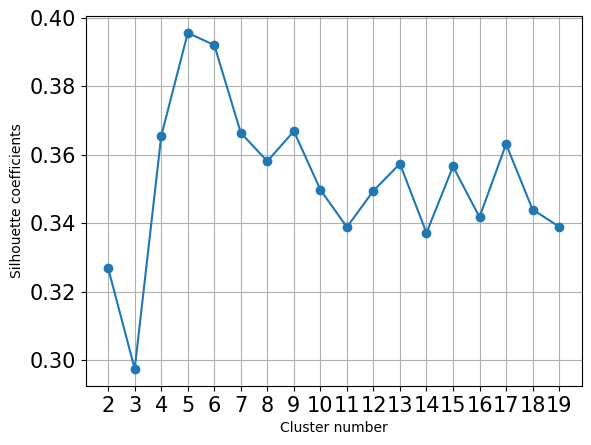

In [8]:
# Silhouette method to get the appropriate k
from sklearn.metrics import silhouette_score

sil_list = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(fetal_clust_scaled)
    score = silhouette_score(fetal_clust_scaled, kmeans.labels_)
    sil_list.append(score)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_score is :",
        score,
    )

print('Final Silhouette score %s' % silhouette_score(fetal_clust_scaled, kmeans.labels_))


plt.plot(range(2, 20), sil_list, marker = 'o')
plt.xticks(range(2, 20))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel("Cluster number")
plt.ylabel("Silhouette coefficients")
plt.grid()
plt.show()

In [35]:
# K-means with 5 clusters

kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(fetal_clust_scaled)

kmeans5.cluster_centers_

clusters_df = pd.DataFrame(kmeans5.labels_)

for k,v in clusters_df.value_counts().items():
    print('cluster: ', k, 'cardinality: ', v)


cluster:  (2,) cardinality:  622
cluster:  (1,) cardinality:  611
cluster:  (0,) cardinality:  486
cluster:  (4,) cardinality:  299
cluster:  (3,) cardinality:  108


<class 'pandas.core.series.Series'>
RangeIndex: 2126 entries, 0 to 2125
Series name: fetal_health
Non-Null Count  Dtype  
--------------  -----  
2126 non-null   float64
dtypes: float64(1)
memory usage: 16.7 KB
None


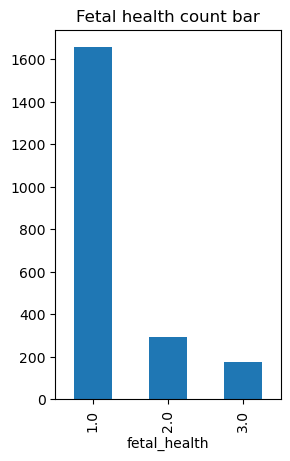

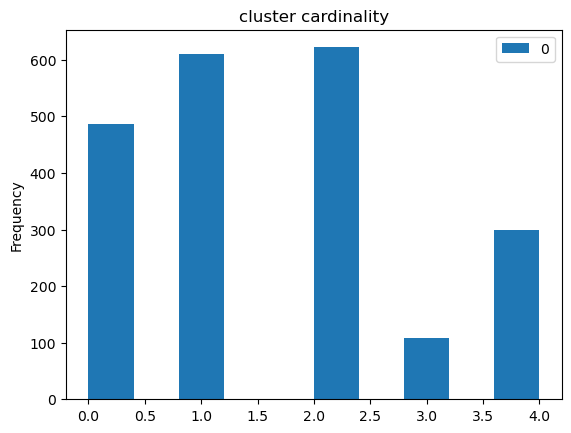

<Axes: xlabel='kmeans_labels'>

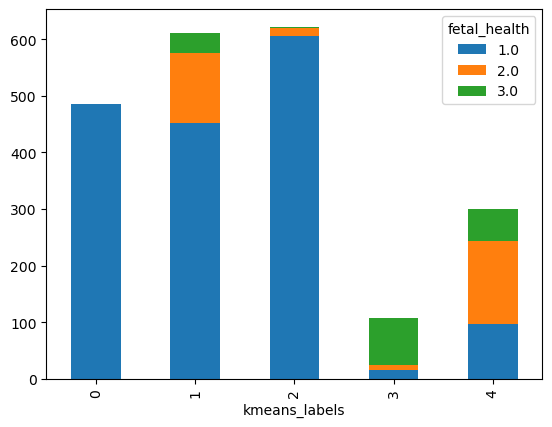

In [51]:
# Interpretation

# reminder that fetal health types
print(fetal_health.info())

plt.subplot(121)
fetal_value_counts.plot(kind='bar')
plt.title("Fetal health count bar")

plt.subplot(121)
clusters_df.plot(kind='hist')
plt.title('cluster cardinality')
plt.show()

fetal_data['kmeans_labels'] = kmeans5.labels_

fetal_health_by_cluster = fetal_health.groupby(fetal_data['kmeans_labels']).value_counts().unstack()

fetal_health_by_cluster.plot(kind='bar', stacked=True,)